## Initialization

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/HKU/STAT3612/Project/

Mounted at /content/drive
/content/drive/MyDrive/HKU/STAT3612/Project


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./stat3612-project-task1/X_train.csv", header=[0,1,2])
df.drop(columns=df.columns[0], inplace=True)

## Feature set A: 17 features - only select 12 features in MIMIC-Extract

In [ ]:
def selected_data_features(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return train.iloc[:, tmp]

def processing_timeseries(train, divide, A_col):
#   _train = train.copy(deep=True)
  ret = []
  train = pd.DataFrame(train)
  for z in range(A_col):
    for x, y in divide:
      tmp = train.iloc[:,int((z*24)+24*x):z*24+24+int(24*y)]
    #   ret.append(tmp.std(axis=1))
      ret.append(tmp.max(axis=1))
    #   ret.append(tmp.mean(axis=1))
      ret.append(tmp.min(axis=1))
    #   ret.append(tmp.skew(axis=1))
    #   ret.append(tmp.max(axis=1) - tmp.min(axis=1))
  return pd.concat(ret, axis=1)

def select_24mean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return data.iloc[:, tmp]

def select_24maskmean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+48)]
  return data.iloc[:, tmp]

def select_24mask(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+24)]
  return data.iloc[:, tmp]

def select_24time(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+48, idx*72+48+24)]
  return data.iloc[:, tmp]

def selected_data_features24all(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72, idx*72+72)]
  return train.iloc[:, tmp]

In [ ]:
features = [
    'Diastolic blood pressure', 
    'Fraction inspired oxygen',
    'Glascow coma scale eye opening',
    'Glascow coma scale motor response',
    'Glascow coma scale total',
    'Glascow coma scale verbal response',
    'Glucose',
    'Heart Rate',
    # 'Height',
    'Mean blood pressure',
    'Oxygen saturation',
    'Respiratory rate',
    'Systolic blood pressure',
    'Temperature',
    'Weight',
    'pH',
]

t = [x for x, y, z in df.columns]
t = list(dict.fromkeys(t))
# print(len(t))

features_idx = []
for feature in features:
  try:
    idx = t.index(feature.lower())
    features_idx.append(idx)
    # print(f'{idx} {feature}')
  except:
    continue

In [ ]:
train = pd.read_pickle('./data/X_train.pkl')
valid = pd.read_pickle('./data/X_valid.pkl')
test  = pd.read_pickle('./data/X_test.pkl')

selected_train = selected_data_features(train, sorted(features_idx))
selected_valid = selected_data_features(valid, sorted(features_idx))
selected_test  = selected_data_features( test, sorted(features_idx))
A_col = selected_train.shape[1] // 24

with open(f'./data/X_train_A.npy', 'wb') as f:
    np.save(f, selected_train)
with open(f'./data/X_valid_A.npy', 'wb') as f:
    np.save(f, selected_valid)
with open(f'./data/X_test_A.npy',  'wb') as f:
    np.save(f,  selected_test)

In [ ]:
def df_reduce(df, A_col, version=1):
    if version == 2:
        """for every indicator, take the std, max, mean, min, skewness, range of mean, discard mask & time"""
        return processing_timeseries(df, [(0, 1)], A_col)
    else:
        """for every indicator, take the mean of mean, discard mask & time"""
        feature_mean = []
        for i in list(range(A_col)):
            feature_list = list(range(i*24, i*24+24))
            feature_mean.append(np.mean(df.iloc[:,feature_list], axis=1))
        df_reduced = np.array(feature_mean).transpose(1,0)
        return df_reduced

In [ ]:
need_reduce = True
version = 1

train = np.load(f'./data/X_train_A.npy')
valid = np.load(f'./data/X_valid_A.npy')
test  = np.load(f'./data/X_test_A.npy')

train = pd.DataFrame(train)
valid = pd.DataFrame(valid)
test  = pd.DataFrame(test)

if need_reduce:
    train = df_reduce(train, A_col, version=version)
    valid = df_reduce(valid, A_col, version=version)
    test  = df_reduce(test,  A_col, version=version)
    with open(f'./data/X_train_A_{version}.npy', 'wb') as f:
        np.save(f, train)
    with open(f'./data/X_valid_A_{version}.npy', 'wb') as f:
        np.save(f, valid)
    with open(f'./data/X_test_A_{version}.npy',  'wb') as f:
        np.save(f,  test)

print(f"Train: {train.shape}\nValid: {valid.shape}")

Train: (16760, 12)
Valid: (2394, 12)


#### From 0123

In [ ]:
def select_24mean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return data.iloc[:, tmp]

def select_24maskmean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+48)]
  return data.iloc[:, tmp]

def select_24mask(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+24)]
  return data.iloc[:, tmp]

def select_24time(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+48, idx*72+48+24)]
  return data.iloc[:, tmp]

def selected_data_features24all(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72, idx*72+72)]
  return train.iloc[:, tmp]

In [ ]:
train = pd.read_pickle('./data/X_train.pkl')
valid = pd.read_pickle('./data/X_valid.pkl')
test  = pd.read_pickle('./data/X_test.pkl')

In [ ]:
train = selected_data_features24all(train, features_idx)
valid = selected_data_features24all(valid, features_idx)
test  = selected_data_features24all(test,  features_idx)

In [ ]:
train_mask = np.array(select_24mask(train))
train_mean = np.array(select_24mean(train))
train_time = np.array(select_24time(train))

train_mask = np.sum(train_mask.reshape(-1,24), axis=1).reshape(-1,12)
train_mean = processing_timeseries(train_mean, [(0, 1)], 12)
train_time = np.mean(train_time.reshape(-1,24), axis=1).reshape(-1,12)
train = np.concatenate([train_mask, train_time, train_mean], axis=1)

In [ ]:
valid_mask = np.array(select_24mask(valid))
valid_mean = np.array(select_24mean(valid))
valid_time = np.array(select_24time(valid))

valid_mask = np.sum(valid_mask.reshape(-1,24), axis=1).reshape(-1,12)
valid_mean = processing_timeseries(valid_mean, [(0, 1)], 12)
valid_time = np.mean(valid_time.reshape(-1,24), axis=1).reshape(-1,12)
valid = np.concatenate([valid_mask, valid_time, valid_mean], axis=1)

In [ ]:
test_mask = np.array(select_24mask(test))
test_mean = np.array(select_24mean(test))
test_time = np.array(select_24time(test))

test_mask = np.sum(test_mask.reshape(-1,24), axis=1).reshape(-1,12)
test_mean = processing_timeseries(test_mean, [(0, 1)], 12)
test_time = np.mean(test_time.reshape(-1,24), axis=1).reshape(-1,12)
test = np.concatenate([test_mask, test_time, test_mean], axis=1)

In [ ]:
with open(f'./data/X_train_A_0123.npy', 'wb') as f:
    np.save(f, train)
with open(f'./data/X_valid_A_0123.npy', 'wb') as f:
    np.save(f, valid)
with open(f'./data/X_test_A_0123.npy',  'wb') as f:
    np.save(f,  test)

## Feature set B: 24 features - Feature set A + SAPS2 + APACHE2

In [4]:
featuresA = [
    'Diastolic blood pressure', 
    'Fraction inspired oxygen',
    'Glascow coma scale eye opening',
    'Glascow coma scale motor response',
    'Glascow coma scale total',
    'Glascow coma scale verbal response',
    'Glucose',
    'Heart Rate',
    'Height',
    'Mean blood pressure',
    'Oxygen saturation',
    'Respiratory rate',
    'Systolic blood pressure',
    'Temperature',
    'Weight',
    'pH',
]

saps2 = [
    'Heart Rate',
    'Systolic Blood Pressure',
    'Temperature',
    'Glascow coma scale total',
    'Fraction inspired oxygen',
    'total protein urine',
    'ph urine',
    'Blood Urea Nitrogen',
    'Sodium',
    'Potassium',
    'Bicarbonate',
    'Bilirubin',
    'White Blood Cell count',
]

apache2 = [
    'Fraction inspired oxygen',
    'temperature',
    'pulmonary artery pressure mean',
    'pH',
    'heart rate',
    'respiratory rate',
    'sodium',
    'potassium',
    'creatinine',
    'hematocrit',
    'white blood cell count',
    'Glascow coma scale total',
]

In [5]:
t = [x for x, y, z in df.columns]
t = list(dict.fromkeys(t))
# print(len(t))

featuresA = list(map(lambda x: x.lower(), featuresA))
saps2 = list(map(lambda x: x.lower(), saps2))
apache2 = list(map(lambda x: x.lower(), apache2))
features = list(set(featuresA + saps2 + apache2))

features_idx = []
for feature in features:
  try:
    idx = t.index(feature.lower())
    features_idx.append(idx)
    # print(f'{idx} {feature}')
  except:
    continue

n_features = len(features_idx)

In [6]:
print(features)

['temperature', 'blood urea nitrogen', 'glucose', 'heart rate', 'bicarbonate', 'systolic blood pressure', 'pulmonary artery pressure mean', 'glascow coma scale motor response', 'creatinine', 'glascow coma scale total', 'mean blood pressure', 'glascow coma scale eye opening', 'diastolic blood pressure', 'fraction inspired oxygen', 'white blood cell count', 'respiratory rate', 'ph urine', 'hematocrit', 'sodium', 'glascow coma scale verbal response', 'oxygen saturation', 'bilirubin', 'height', 'weight', 'potassium', 'ph', 'total protein urine']


In [ ]:
train = pd.read_pickle('./data/X_train.pkl')
valid = pd.read_pickle('./data/X_valid.pkl')
test  = pd.read_pickle('./data/X_test.pkl')

train = selected_data_features24all(train, features_idx)
valid = selected_data_features24all(valid, features_idx)
test  = selected_data_features24all(test,  features_idx)

train_mask = np.array(select_24mask(train, n_features))
train_mean = np.array(select_24mean(train, n_features))
# train_time = np.array(select_24time(train, n_features))
train_mask = np.sum(train_mask.reshape(-1,24), axis=1).reshape(-1,n_features)
train_mean = np.array(processing_timeseries(train_mean, [(0, 1)], n_features))
# train_time = np.mean(train_time.reshape(-1,24), axis=1).reshape(-1,n_features)
# train = np.concatenate([train_mask, train_time, train_mean], axis=1)
train = np.concatenate([train_mask, train_mean], axis=1)

valid_mask = np.array(select_24mask(valid, n_features))
valid_mean = np.array(select_24mean(valid, n_features))
# valid_time = np.array(select_24time(valid, n_features))
valid_mask = np.sum(valid_mask.reshape(-1,24), axis=1).reshape(-1,n_features)
valid_mean = np.array(processing_timeseries(valid_mean, [(0, 1)], n_features))
# valid_time = np.mean(valid_time.reshape(-1,24), axis=1).reshape(-1,n_features)
# valid = np.concatenate([valid_mask, valid_time, valid_mean], axis=1)
valid = np.concatenate([valid_mask, valid_mean], axis=1)

test_mask = np.array(select_24mask(test, n_features))
test_mean = np.array(select_24mean(test, n_features))
# test_time = np.array(select_24time(test, n_features))
test_mask = np.sum(test_mask.reshape(-1,24), axis=1).reshape(-1,n_features)
test_mean = np.array(processing_timeseries(test_mean, [(0, 1)], n_features))
# test_time = np.mean(test_time.reshape(-1,24), axis=1).reshape(-1,n_features)
# test = np.concatenate([test_mask, test_time, test_mean], axis=1)
test = np.concatenate([test_mask, test_mean], axis=1)

In [ ]:
version = 1
if version == 1:
    with open(f'./data/X_train_B_{version}.npy', 'wb') as f:
        np.save(f, train)
    with open(f'./data/X_valid_B_{version}.npy', 'wb') as f:
        np.save(f, valid)
    with open(f'./data/X_test_B_{version}.npy',  'wb') as f:
        np.save(f,  test)
else:
    with open(f'./data/X_train_B.npy', 'wb') as f:
        np.save(f, train)
    with open(f'./data/X_valid_B.npy', 'wb') as f:
        np.save(f, valid)
    with open(f'./data/X_test_B.npy',  'wb') as f:
        np.save(f,  test)

## Feature set C: 41 features - Feature set B + wudi_index

In [ ]:
featuresA = [
    'Diastolic blood pressure', 
    'Fraction inspired oxygen',
    'Glascow coma scale eye opening',
    'Glascow coma scale motor response',
    'Glascow coma scale total',
    'Glascow coma scale verbal response',
    'Glucose',
    'Heart Rate',
    'Height',
    'Mean blood pressure',
    'Oxygen saturation',
    'Respiratory rate',
    'Systolic blood pressure',
    'Temperature',
    'Weight',
    'pH',
]

saps2 = [
    'Heart Rate',
    'Systolic Blood Pressure',
    'Temperature',
    'Glascow coma scale total',
    'Fraction inspired oxygen',
    'total protein urine',
    'ph urine',
    'Blood Urea Nitrogen',
    'Sodium',
    'Potassium',
    'Bicarbonate',
    'Bilirubin',
    'White Blood Cell count',
]

apache2 = [
    'Fraction inspired oxygen',
    'temperature',
    'pulmonary artery pressure mean',
    'pH',
    'heart rate',
    'respiratory rate',
    'sodium',
    'potassium',
    'creatinine',
    'hematocrit',
    'white blood cell count',
    'Glascow coma scale total',
]

t = [x for x, y, z in df.columns]
t = list(dict.fromkeys(t))
# print(len(t))

featuresA = list(map(lambda x: x.lower(), featuresA))
saps2 = list(map(lambda x: x.lower(), saps2))
apache2 = list(map(lambda x: x.lower(), apache2))
features = list(set(featuresA + saps2 + apache2))

features_idx = []
for feature in features:
  try:
    idx = t.index(feature.lower())
    features_idx.append(idx)
    # print(f'{idx} {feature}')
  except:
    continue

wudi_idx = [0,6,7,9,10,11,19,31,36,37,38,42,45,46,53,54,56,60,61,62,64,72,73,75,87,91,99,41,57,89]
features_idx = list(set(wudi_idx + features_idx))

n_features = len(features_idx)
print(n_features)

41


In [ ]:
def selected_data_features(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return train.iloc[:, tmp]

def processing_timeseries(train, divide, A_col):
#   _train = train.copy(deep=True)
  ret = []
  train = pd.DataFrame(train)
  for z in range(A_col):
    for x, y in divide:
      tmp = train.iloc[:,int((z*24)+24*x):z*24+24+int(24*y)]
      ret.append(tmp.std(axis=1))
    #   ret.append(tmp.max(axis=1))
      ret.append(tmp.mean(axis=1))
    #   ret.append(tmp.min(axis=1))
    #   ret.append(tmp.skew(axis=1))
      ret.append(tmp.max(axis=1) - tmp.min(axis=1))
  return pd.concat(ret, axis=1)

def select_24mean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return data.iloc[:, tmp]

def select_24maskmean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+48)]
  return data.iloc[:, tmp]

def select_24mask(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+24)]
  return data.iloc[:, tmp]

def select_24time(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+48, idx*72+48+24)]
  return data.iloc[:, tmp]

def selected_data_features24all(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72, idx*72+72)]
  return train.iloc[:, tmp]

In [ ]:
train = pd.read_pickle('./data/X_train.pkl')
valid = pd.read_pickle('./data/X_valid.pkl')
test  = pd.read_pickle('./data/X_test.pkl')

train = selected_data_features24all(train, features_idx)
valid = selected_data_features24all(valid, features_idx)
test  = selected_data_features24all(test,  features_idx)

# train_mask = np.array(select_24mask(train, n_features))
train_mean = np.array(select_24mean(train, n_features))
train_time = np.array(select_24time(train, n_features))
# train_mask = np.sum(train_mask.reshape(-1,24), axis=1).reshape(-1,n_features)
train_mean = np.array(processing_timeseries(train_mean, [(0, 1)], n_features))
train_time = np.mean(train_time.reshape(-1,24), axis=1).reshape(-1,n_features)
# train = np.concatenate([train_mask, train_time, train_mean], axis=1)
# train = np.concatenate([train_mask, train_mean], axis=1)
train = np.concatenate([train_time, train_mean], axis=1)
# train = train_mean

# valid_mask = np.array(select_24mask(valid, n_features))
valid_mean = np.array(select_24mean(valid, n_features))
valid_time = np.array(select_24time(valid, n_features))
# valid_mask = np.sum(valid_mask.reshape(-1,24), axis=1).reshape(-1,n_features)
valid_mean = np.array(processing_timeseries(valid_mean, [(0, 1)], n_features))
valid_time = np.mean(valid_time.reshape(-1,24), axis=1).reshape(-1,n_features)
# valid = np.concatenate([valid_mask, valid_time, valid_mean], axis=1)
# valid = np.concatenate([valid_mask, valid_mean], axis=1)
valid = np.concatenate([valid_time, valid_mean], axis=1)
# valid = valid_mean

# test_mask = np.array(select_24mask(test, n_features))
test_mean = np.array(select_24mean(test, n_features))
test_time = np.array(select_24time(test, n_features))
# test_mask = np.sum(test_mask.reshape(-1,24), axis=1).reshape(-1,n_features)
test_mean = np.array(processing_timeseries(test_mean, [(0, 1)], n_features))
test_time = np.mean(test_time.reshape(-1,24), axis=1).reshape(-1,n_features)
# test = np.concatenate([test_mask, test_time, test_mean], axis=1)
# test = np.concatenate([test_mask, test_mean], axis=1)
test = np.concatenate([test_time, test_mean], axis=1)
# test = test_mean

In [ ]:
train.shape

(16760, 164)

In [ ]:
version = 2
if version == 1 or version == 2:
    with open(f'./data/X_train_C_{version}.npy', 'wb') as f:
        np.save(f, train)
    with open(f'./data/X_valid_C_{version}.npy', 'wb') as f:
        np.save(f, valid)
    with open(f'./data/X_test_C_{version}.npy',  'wb') as f:
        np.save(f,  test)
else:
    with open(f'./data/X_train_C.npy', 'wb') as f:
        np.save(f, train)
    with open(f'./data/X_valid_C.npy', 'wb') as f:
        np.save(f, valid)
    with open(f'./data/X_test_C.npy',  'wb') as f:
        np.save(f,  test)

## Raw

In [ ]:
# Level 1: feature number - 104
# Level 2: group (mask, mean, time_since_measured) - 3
# Level 3: time - 24
threshold = 2200
def feature_engineering(df, version=1):
    if version <= 0:
        return df
    elif version == 2:
        """for every indicator, take the mean of mean, discard mask & time (adding threshold)"""
        feature_mean = []
        removed_list = []
        for i in list(range(104)):
            feature_list = list(range(i*72+24, i*72+48))
            feature_mean.append(np.mean(df.iloc[:,feature_list], axis=1))
            tmp = np.sum(df.iloc[:,feature_list], axis=1)
            if tmp[tmp==0].count() >= threshold:
                removed_list.append(i)
        df_reduced = np.array(feature_mean).transpose(1,0)
        return df_reduced, removed_list
    elif version == 3:
        """for every indicator, take the mean of mean & time, discard mask"""
        feature_mean = []
        removed_list = []
        for i in list(range(104)):
            feature_list = list(range(i*72+24, i*72+48))
            feature_mean.append(np.mean(df.iloc[:,feature_list], axis=1))
            feature_list = list(range(i*72+48, i*72+72))
            feature_mean.append(np.mean(df.iloc[:,feature_list], axis=1))
        df_reduced = np.array(feature_mean).transpose(1,0)
        return df_reduced
    elif version == 4:
        """for every indicator, take the sum of mask, discard mean & time"""
        feature_mean = []
        for i in list(range(104)):
            feature_list = list(range(i*72, i*72+24))
            feature_mean.append(np.sum(df.iloc[:,feature_list], axis=1))
        df_reduced = np.array(feature_mean).transpose(1,0)
        return df_reduced
    else:
        """for every indicator, take the mean of mean, discard mask & time"""
        feature_mean = []
        for i in list(range(104)):
            feature_list = list(range(i*72+24, i*72+48))
            feature_mean.append(np.mean(df.iloc[:,feature_list], axis=1))
        df_reduced = np.array(feature_mean).transpose(1,0)
        return df_reduced

In [ ]:
version = 4
if version == 1 or version == 3 or version == 4:
    with open(f'./data/X_train_reduced_{version}.npy', 'wb') as f:
        np.save(f, feature_engineering(pd.read_pickle('./data/X_train.pkl'), version=version))
    with open(f'./data/X_valid_reduced_{version}.npy', 'wb') as f:
        np.save(f, feature_engineering(pd.read_pickle('./data/X_valid.pkl'), version=version))
    with open(f'./data/X_test_reduced_{version}.npy', 'wb') as f:
        np.save(f, feature_engineering(pd.read_pickle('./data/X_test.pkl'), version=version))
elif version == 2:
    train, train_rm = feature_engineering(pd.read_pickle('./data/X_train.pkl'), version=version)
    valid, valid_rm = feature_engineering(pd.read_pickle('./data/X_valid.pkl'), version=version)
    test, test_rm = feature_engineering(pd.read_pickle('./data/X_test.pkl'), version=version)
    rm = list(set(train_rm) & set(valid_rm) & set(test_rm))
    idx = [i for i in range(104) if i not in rm]
    with open(f'./data/X_train_reduced_{version}.npy', 'wb') as f:
        np.save(f, train[:,idx])
    with open(f'./data/X_valid_reduced_{version}.npy', 'wb') as f:
        np.save(f, valid[:,idx])
    with open(f'./data/X_test_reduced_{version}.npy', 'wb') as f:
        np.save(f, test[:,idx])

## Sample checking

In [ ]:
l = [i*72 for i in [88,6,36,11,56,78,80]]
df.iloc[0:,l].columns

MultiIndex([(                     'respiratory rate set', 'mask', '0'),
            (                                'anion gap', 'mask', '0'),
            (                 'glascow coma scale total', 'mask', '0'),
            (                      'blood urea nitrogen', 'mask', '0'),
            ('mean corpuscular hemoglobin concentration', 'mask', '0'),
            (                      'prothrombin time pt', 'mask', '0'),
            (       'pulmonary artery pressure systolic', 'mask', '0')],
           )

In [ ]:
df[df.columns[:24]].head(3)

alanine aminotransferase                                               ...  \
                      mask                                               ...   
                         0    1    2    3    4    5    6    7    8    9  ...   
0                      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1                      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

                                                     
                                                     
    14   15   16   17   18   19   20   21   22   23  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[3 rows x 24 columns]

In [ ]:
df[df.columns[24:24+24]].head(3)

alanine aminotransferase                                                    \
                      mean                                                     
                         0         1         2         3         4         5   
0                -0.254460 -0.254460 -0.254460 -0.254460 -0.254460 -0.254460   
1                -0.256599 -0.256599 -0.256599 -0.256599 -0.256599 -0.256599   
2                -0.269432 -0.269432 -0.269432 -0.269432 -0.269432 -0.269432   

                                           ...                                \
                                           ...                                 
          6         7         8         9  ...        14        15        16   
0 -0.254460 -0.254460 -0.254460 -0.254460  ... -0.254460 -0.254460 -0.254460   
1 -0.256599 -0.256599 -0.256599 -0.256599  ... -0.256599 -0.256599 -0.256599   
2 -0.269432 -0.269432 -0.269432 -0.269432  ... -0.269432 -0.269432 -0.269432   

                                                                         
                                                                         
         17        18        19        20        21        22        23  
0 -0.254460 -0.254460 -0.254460 -0.254460 -0.254460 -0.254460 -0.254460  
1 -0.256599 -0.256599 -0.256599 -0.256599 -0.256599 -0.256599 -0.256599  
2 -0.269432 -0.269432 -0.269432 -0.269432 -0.269432 -0.269432 -0.269432  

[3 rows x 24 columns]

In [ ]:
df[df.columns[48:48+24]].head(3)

alanine aminotransferase                                                  \
       time_since_measured                                                   
                         0     1     2     3     4     5     6     7     8   
0                      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   
1                      0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   
2                     24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0   

         ...                                                              
         ...                                                              
      9  ...    14    15    16    17    18    19    20    21    22    23  
0   9.0  ...  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  
1   9.0  ...  14.0  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  
2  33.0  ...  38.0  39.0  40.0  41.0  42.0  43.0   0.0   1.0   2.0   3.0  

[3 rows x 24 columns]

In [ ]:
df[df.columns[72:72+24]].head(3)

albumin                                               ...                 \
     mask                                               ...                  
        0    1    2    3    4    5    6    7    8    9  ...   14   15   16   
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

                                      
                                      
    17   18   19   20   21   22   23  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 24 columns]

## Distribution Plot

### Task 1

#### Initialization

In [ ]:
t = [x for x, y, z in df.columns]
t = list(dict.fromkeys(t))
# print(len(t))

# featuresA = list(map(lambda x: x.lower(), featuresA))
# saps2 = list(map(lambda x: x.lower(), saps2))
# apache2 = list(map(lambda x: x.lower(), apache2))
# features = list(set(featuresA + saps2 + apache2))

# features_idx = []
# for feature in features:
#   try:
#     idx = t.index(feature.lower())
#     features_idx.append(idx)
#     # print(f'{idx} {feature}')
#   except:
#     continue

# wudi_idx = [0,6,7,9,10,11,19,31,36,37,38,42,45,46,53,54,56,60,61,62,64,72,73,75,87,91,99,41,57,89]
# features_idx = list(set(wudi_idx + features_idx))
# # feautres_idx = wudi_idx

# n_features = len(features_idx)
# print(n_features)

In [ ]:
def selected_data_features(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return train.iloc[:, tmp]

def processing_timeseries(train, divide, A_col):
#   _train = train.copy(deep=True)
  ret = []
  train = pd.DataFrame(train)
  for z in range(A_col):
    for x, y in divide:
      tmp = train.iloc[:,int((z*24)+24*x):z*24+24+int(24*y)]
    #   ret.append(tmp.std(axis=1))
    #   ret.append(tmp.max(axis=1))
    #   ret.append(tmp.mean(axis=1))
    #   ret.append(tmp.min(axis=1))
    #   ret.append(tmp.skew(axis=1))
      ret.append(tmp.max(axis=1) - tmp.min(axis=1))
  return pd.concat(ret, axis=1)

def select_24mean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return data.iloc[:, tmp]

def select_24maskmean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+48)]
  return data.iloc[:, tmp]

def select_24mask(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+24)]
  return data.iloc[:, tmp]

def select_24time(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+48, idx*72+48+24)]
  return data.iloc[:, tmp]

def selected_data_features24all(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72, idx*72+72)]
  return train.iloc[:, tmp]

#### mean: mean

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24mean(train, n_features))
train = np.mean(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/MEAN_mean/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_mean_mean = [0,6,7,9,10,11,31,36,37,38,53,54,56,57,73,87,91] + [4,14,28,49,51,59,84,97]
not_useful_mean_mean = [2,3,8,12,15,16,17,18,20,21,22,23,27,29,32,39,44,47,48,50,52,76,77,79,80,81,82,83,85,88,95,96,98,100,101,102]

#### mean: max

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24mean(train, n_features))
train = np.max(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/MEAN_max/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_mean_max = [0,6,7,9,10,11,38,40,60,87] + [4,12,14,28,29,49,51,]
not_useful_mean_max = [2,3,8,15,16,17,20,21,22,23,27,31,32,39,44,47,48,50,52,53,55,59,74,76,77,79,80,81,82,83,84,85,90,93,95,96,97,98,100,102,103]

#### mean: range

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24mean(train, n_features))
train = np.array(processing_timeseries(train, [(0, 1)], n_features))
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/MEAN_range/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_mean_range = []
not_useful_mean_range = []

#### mean: std

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24mean(train, n_features))
train = np.std(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/MEAN_std/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_mean_std = []
not_useful_mean_std = []

#### mask: sum

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24mask(train, n_features))
train = np.sum(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/MASK_sum/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_mask_sum = []
not_useful_mask_sum = []

#### time: mean

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24time(train, n_features))
train = np.mean(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/TIME_mean/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_time_mean = []
not_useful_time_mean = []

#### time: max

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_1.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24time(train, n_features))
train = np.max(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

train_0 = train.iloc[np.where(train_y==0)[0],:]
train_1 = train.iloc[np.where(train_y==1)[0],:]

# k = 0
# for i in range(k, min(104,k+10)):
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.distplot(train_0.iloc[:,i], hist=False, color="red")
    sns.distplot(train_1.iloc[:,i], hist=False, color="blue")
    plt.savefig(f"./fig/task1/TIME_max/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
useful_time_mean = []
not_useful_time_mean = []

#### TBC

### Task 2

#### Initialization

In [ ]:
t = [x for x, y, z in df.columns]
t = list(dict.fromkeys(t))
# print(len(t))

# featuresA = list(map(lambda x: x.lower(), featuresA))
# saps2 = list(map(lambda x: x.lower(), saps2))
# apache2 = list(map(lambda x: x.lower(), apache2))
# features = list(set(featuresA + saps2 + apache2))

# features_idx = []
# for feature in features:
#   try:
#     idx = t.index(feature.lower())
#     features_idx.append(idx)
#     # print(f'{idx} {feature}')
#   except:
#     continue

# wudi_idx = [0,6,7,9,10,11,19,31,36,37,38,42,45,46,53,54,56,60,61,62,64,72,73,75,87,91,99,41,57,89]
# features_idx = list(set(wudi_idx + features_idx))
# # feautres_idx = wudi_idx

# n_features = len(features_idx)
# print(n_features)

In [ ]:
def selected_data_features(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return train.iloc[:, tmp]

def processing_timeseries(train, divide, A_col):
#   _train = train.copy(deep=True)
  ret = []
  train = pd.DataFrame(train)
  for z in range(A_col):
    for x, y in divide:
      tmp = train.iloc[:,int((z*24)+24*x):z*24+24+int(24*y)]
    #   ret.append(tmp.std(axis=1))
    #   ret.append(tmp.max(axis=1))
    #   ret.append(tmp.mean(axis=1))
    #   ret.append(tmp.min(axis=1))
    #   ret.append(tmp.skew(axis=1))
      ret.append(tmp.max(axis=1) - tmp.min(axis=1))
  return pd.concat(ret, axis=1)

def select_24mean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+24, idx*72+48)]
  return data.iloc[:, tmp]

def select_24maskmean(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+48)]
  return data.iloc[:, tmp]

def select_24mask(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72, idx*72+24)]
  return data.iloc[:, tmp]

def select_24time(data, k):
  tmp = []
  for idx in range(k):
    tmp += [i for i in range(idx*72+48, idx*72+48+24)]
  return data.iloc[:, tmp]

def selected_data_features24all(train, features_idx):
  tmp = []
  for idx in features_idx:
    tmp += [i for i in range(idx*72, idx*72+72)]
  return train.iloc[:, tmp]

#### LOS distribution

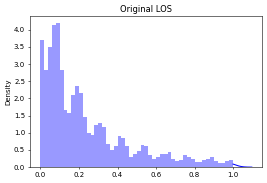

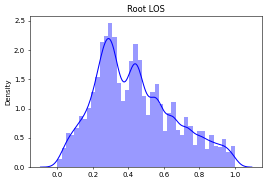

In [ ]:
train_y = pd.read_pickle('./data/Y_train_2.pkl')

minmax = True
if minmax:
    scaler = MinMaxScaler()
    scaler.fit(train_y)
    train_y = scaler.transform(train_y)

plt.figure(dpi=50)
plt.title("Original LOS")
sns.distplot(train_y, hist=True, color="blue", kde_kws={'clip': (1.0, 10.0)})
plt.show()

# plt.figure(dpi=50)
# plt.title("Log LOS")
# sns.distplot(np.log(train_y), hist=True, color="blue")
# plt.show()

plt.figure(dpi=50)
plt.title("Root LOS")
sns.distplot(np.sqrt(train_y), hist=True, color="blue")
plt.show()

# plt.figure(dpi=50)
# plt.title("Box-Cox LOS")
# sns.distplot(np.array(boxcox(train_y.squeeze(axis=1))[0]), hist=True, color="blue")
# plt.show()

# plt.figure(dpi=50)
# plt.title("MinMax LOS")
# sns.distplot(train_y_minmax, hist=True, color="blue")
# plt.show()


In [ ]:
np.array(boxcox(train_y.squeeze(axis=1))[0])#.expand_dims(axis=1)

(16760,)

#### mean:mean

In [ ]:
features_idx = list(range(104))
n_features = 104

train = pd.read_pickle('./data/X_train.pkl')
train_y = pd.read_pickle('./data/Y_train_2.pkl')

train = selected_data_features24all(train, features_idx)
train = np.array(select_24mean(train, n_features))
train = np.mean(train.reshape(-1,24), axis=1).reshape(-1,n_features)
train = pd.DataFrame(train)

# train_0 = train.iloc[np.where(train_y==0)[0],:]
# train_1 = train.iloc[np.where(train_y==1)[0],:]

In [ ]:
pd.DataFrame(train.iloc[:,1]).shape
# train_y.shape

(16760, 1)

In [ ]:
for i in range(104):
    plt.figure(dpi=120)
    plt.title(f"Feature {i}")
    sns.regplot(x=train.iloc[:,i], y=train_y, ci=None, 
                scatter_kws={'s': 1.5, "color": "blue"},
                line_kws={"color": "red", 'linewidth': 1})
    plt.xlabel(None)
    plt.ylabel(None)
    plt.savefig(f"./fig/task2/MEAN_mean/feature_{i}.jpg")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.